<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Define-a-Distribution" data-toc-modified-id="Define-a-Distribution-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Define a Distribution</a></span></li><li><span><a href="#Define-an-Observed-Value" data-toc-modified-id="Define-an-Observed-Value-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Define an Observed Value</a></span></li><li><span><a href="#Calculate-the-Probability-of-the-“Tail”" data-toc-modified-id="Calculate-the-Probability-of-the-“Tail”-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Calculate the Probability of the “Tail”</a></span></li><li><span><a href="#Get-a-Sample" data-toc-modified-id="Get-a-Sample-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Get a Sample</a></span></li><li><span><a href="#Observe-the-Mean-of-the-Sample" data-toc-modified-id="Observe-the-Mean-of-the-Sample-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Observe the Mean of the Sample</a></span></li><li><span><a href="#Define-Another-Observed-Value" data-toc-modified-id="Define-Another-Observed-Value-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Define Another Observed Value</a></span></li><li><span><a href="#Calculate-the-Probability-of-the-“Tail”-Again" data-toc-modified-id="Calculate-the-Probability-of-the-“Tail”-Again-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Calculate the Probability of the “Tail” Again</a></span></li><li><span><a href="#The-Sample-Sizes-and-the-Sample-Mean-Distributions" data-toc-modified-id="The-Sample-Sizes-and-the-Sample-Mean-Distributions-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>The Sample Sizes and the Sample Mean Distributions</a></span></li></ul></div>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import IPython as ip
mpl.style.use('ggplot')
mpl.rc('font', family='Noto Sans CJK TC')
ip.display.set_matplotlib_formats('svg')

In [3]:
np.random.seed(20180701)

# Define a Distribution

In [4]:
std_norm = sp.stats.norm(loc=0, scale=1)
std_norm_rvs = std_norm.rvs(size=1000)

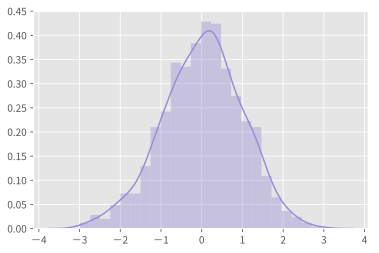

In [5]:
sns.distplot(std_norm_rvs, color='C2')

# Define an Observed Value

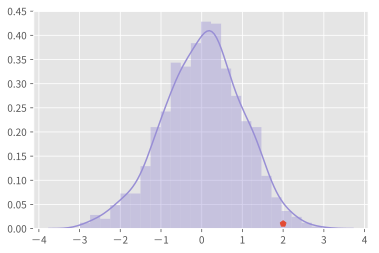

In [6]:
ov = 2
sns.distplot(std_norm_rvs, color='C2')
plt.plot(ov, 0.01, 'p')

# Calculate the Probability of the “Tail”

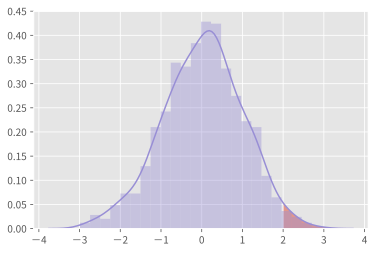

In [7]:
sns.distplot(std_norm_rvs, color='C2')

ax = plt.gca()
kde_x, kde_y = ax.lines[0].get_data()
ax.fill_between(kde_x, kde_y, where=kde_x>ov, alpha=0.5)

# plt.savefig('figures/03_the_tail.png', bbox_inches='tight', dpi=600)

p-value  
= Given the theoretical distribution, the probability of more extreme values than the observed value  
= P(more extreme values | the theoretical distribution)  
= P(the tail | the theoretical distribution)
= P(X > x | std norm) in this case

The formal definitions:

p-value  
= $ P(X \geq x \mid H) $ if right tail event  
= $ P(X \leq x \mid H) $ if left tail event  
= $ 2\min\{P(X\leq x \mid H),P(X\geq x \mid H)\} $ if double tail event  

In [8]:
# sf(x) -> P(X > x)
std_norm.sf(ov)

0.022750131948179195

# Get a Sample

In [9]:
sample = sp.stats.norm.rvs(loc=170, scale=5, size=100, random_state=20180706)

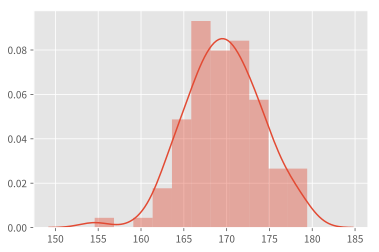

In [10]:
sns.distplot(sample)

# Observe the Mean of the Sample

In [11]:
sm = sample.mean()
ss = sample.std(ddof=1)
sem = sp.stats.sem(sample)  # standard error of the mean
assert sem == ss/np.sqrt(len(sample))  # in this case

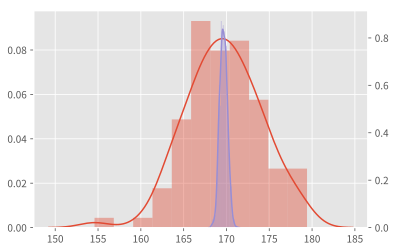

In [12]:
ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.grid(False)

sns.distplot(sample, ax=ax1)

# assume sample mean follows a normal distribution
sm_dist = sp.stats.norm(loc=sm, scale=sem)
sm_dist = sm_dist.rvs(size=1000)  # just for visualizing
sns.distplot(sm_dist, color='C2', ax=ax2)

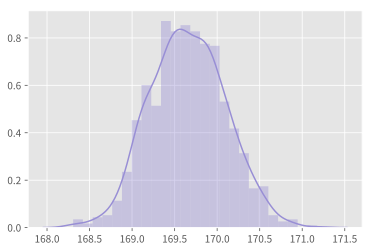

In [13]:
sns.distplot(sm_dist, color='C2')

# Define Another Observed Value

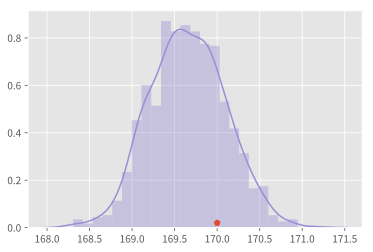

In [14]:
another_ov = 170
sns.distplot(sm_dist, color='C2')
plt.plot(another_ov, 0.02, 'p')

# Calculate the Probability of the “Tail” Again

In [15]:
# https://en.wikipedia.org/wiki/Standard_score#Standardizing_in_mathematical_statistics
z_score = (another_ov-sm)/sem
print(std_norm.sf(z_score))

0.21699825975676862


In [16]:
# returns the endpoints of the range that contains `alpha=` percent of the distribution
# which is just the confidence level
sp.stats.norm.interval(loc=sm, scale=sem, alpha=0.95)

(168.79663025079068, 170.51674198433423)

In [17]:
# Student's t-distribution is a better assumption,
# since it considers the degree of freedom
sp.stats.t.interval(loc=sm, scale=sem, df=len(sample)-1, alpha=0.95)

(168.78598775598337, 170.52738447914155)

# The Sample Sizes and the Sample Mean Distributions

In [18]:
def plot_by_sample_size(n):
    
    sample = sp.stats.norm.rvs(loc=170, scale=5, size=n, random_state=20180706)
    
    sm = sample.mean()
    ss = sample.std(ddof=1)
    sem = sp.stats.sem(sample)
    
    ax1 = plt.gca()
    ax2 = ax1.twinx()
    ax2.grid(False)

    sns.distplot(sample, ax=ax1)

    sm_dist = sp.stats.norm(loc=sm, scale=sem)
    sm_dist = sm_dist.rvs(size=1000)
    sns.distplot(sm_dist, color='C2', ax=ax2)

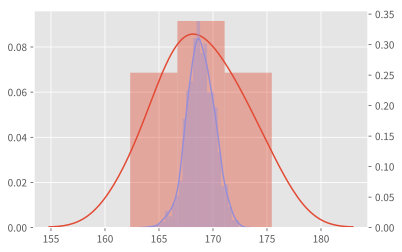

In [19]:
plot_by_sample_size(10)

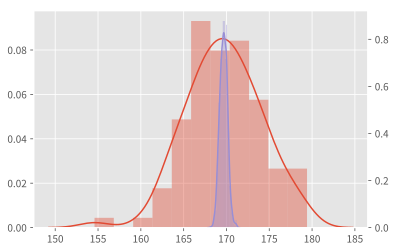

In [20]:
plot_by_sample_size(100)

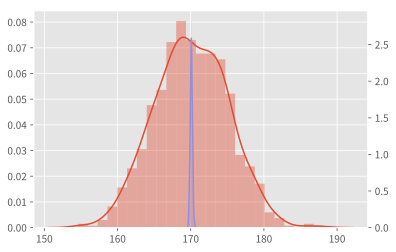

In [21]:
plot_by_sample_size(1000)